In [68]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [69]:
DATA_DIR = Path("../Preprocessed_Data_Training_Testing/")

In [70]:
dfs: dict[str, pd.DataFrame] = {}
for csv_path in DATA_DIR.glob("*.csv"):
    dfs[csv_path.name] = pd.read_csv(csv_path).convert_dtypes()
dfs.keys()

dict_keys(['DATA_Dec_Jan_Italy.csv', 'DATA_Dec_Jan_Hungary.csv', 'DATA_March_Apr_Hungary.csv', 'DATA_Feb_March_Italy.csv', 'DATA_May_June_Hungary.csv', 'DATA_October_November_Hungary.csv', 'DATA_Dec_Jan_Polonia_2.csv', 'DATA_Nov_Dic_Hungary.csv', 'DATA_October_November_Italy.csv', 'DATA_Nov_Dec_Polonia_3.csv', 'DATA_Genn_Feb_Hungary.csv', 'DATA_Dec_Jan_Polonia_1.csv'])

In [129]:
hungary_dfs = []
for filename, df in dfs.items():
    if "hungary" in filename.lower():
        hungary_dfs.append(df)
hungary_df = pd.concat(hungary_dfs)
hungary_df

,BoilerConsumption_CH,BoilerConsumption_DHW,RoomTemperature,OutdoorTemperature,WaterFlowTemp,WaterReturnTemp,FanModulatorOutput,FanSpeed,TemperatureSetpoint
0,9350,572,219.0,19.0,518.0,365.0,59,2909,220
1,9350,572,219.0,19.096447,553.0,398.0,59,2909,220
2,9350,572,219.0,19.192893,552.0,407.0,59,2909,220
3,9350,572,219.25,19.28934,551.0,416.0,59,2909,220
4,9350,572,219.5,19.385787,551.0,425.0,59,2909,220
...,...,...,...,...,...,...,...,...,...
15921,5762,1039,215.0,92.173913,552.0,392.0,76,3289,215
15922,5762,1039,215.25,93.130435,551.5,401.0,76,3289,215
15923,5762,1039,215.5,94.086957,551.0,410.0,76,3289,215
15924,5762,1039,215.75,95.043478,551.0,423.0,76,3289,215


In [126]:
EXAMPLE_FILENAME = "DATA_March_Apr_Hungary.csv"

example_df = dfs[EXAMPLE_FILENAME]
example_df

,BoilerConsumption_CH,BoilerConsumption_DHW,RoomTemperature,OutdoorTemperature,WaterFlowTemp,WaterReturnTemp,FanModulatorOutput,FanSpeed,TemperatureSetpoint
0,50,554,<NA>,80.0,546.0,470.0,64,0,215
1,50,554,<NA>,80.447514,567.5,521.5,64,0,215
2,50,554,<NA>,80.895028,589.0,573.0,64,0,215
3,50,554,218.0,81.342541,586.0,566.5,64,0,215
4,50,554,218.0,81.790055,583.0,560.0,64,0,215
...,...,...,...,...,...,...,...,...,...
14795,7250,0,210.142857,40.0,385.75,342.5,0,0,210
14796,7250,0,210.0,40.0,383.0,341.0,0,0,210
14797,7250,0,209.666667,40.0,379.0,338.5,0,0,210
14798,7250,0,209.333333,40.0,375.0,336.0,0,0,210


In [125]:
example_df.isna().any()

BoilerConsumption_CH     False
BoilerConsumption_DHW    False
RoomTemperature           True
OutdoorTemperature       False
WaterFlowTemp            False
WaterReturnTemp          False
FanModulatorOutput       False
FanSpeed                 False
TemperatureSetpoint      False
dtype: bool

In [128]:
example_df.fillna(method="backfill").to_csv(
    DATA_DIR / EXAMPLE_FILENAME.replace(".csv", "_filled.csv"),
    index=False,
)

In [72]:
for df in dfs.values():
    assert (df.columns == example_df.columns).all()

In [73]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BoilerConsumption_CH   16442 non-null  Int64  
 1   BoilerConsumption_DHW  16442 non-null  Int64  
 2   RoomTemperature        16442 non-null  Float64
 3   OutdoorTemperature     16442 non-null  Float64
 4   WaterFlowTemp          16442 non-null  Float64
 5   WaterReturnTemp        16442 non-null  Float64
 6   FanModulatorOutput     16442 non-null  Int64  
 7   FanSpeed               16442 non-null  Int64  
 8   TemperatureSetpoint    16442 non-null  Int64  
dtypes: Float64(4), Int64(5)
memory usage: 1.3 MB


In [131]:
hungary_df.shape[0] / (365 * 24 * 60 * 60)

0.0028376141552511414

In [75]:
SHARED_COLUMNS = [
    "FanModulatorOutput",
    "FanSpeed",
]
CENTRAL_HEATING_COLUMNS = [
    "BoilerConsumption_CH",
    "RoomTemperature",
    "OutdoorTemperature",
    "TemperatureSetpoint",
]
DOMESTIC_HOT_WATER_COLUMNS = [
    "BoilerConsumption_DHW",
    "WaterFlowTemp",
    "WaterReturnTemp",
]

In [76]:
normalised_example_df = (example_df - example_df.mean()) / example_df.std()
normalised_example_df.describe()

,BoilerConsumption_CH,BoilerConsumption_DHW,RoomTemperature,OutdoorTemperature,WaterFlowTemp,WaterReturnTemp,FanModulatorOutput,FanSpeed,TemperatureSetpoint
count,16442.0,16442.0,16442.0,16442.0,16442.0,16442.0,16442.0,16442.0,16442.0
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.693937,-1.088515,-3.885895,-2.334607,-4.174122,-2.53325,-1.089324,-0.889342,-4.159482
25%,-0.781189,-0.811394,-0.095942,-0.750109,-0.432397,-0.689835,-1.089324,-0.889342,0.428494
50%,-0.078157,-0.218227,0.255983,0.034031,0.15679,-0.157843,0.184816,-0.25103,0.428494
75%,0.807082,0.621475,0.580836,0.737016,0.360838,0.633959,0.668989,0.759412,0.428494
max,2.487288,2.979314,2.17803,2.66806,3.01856,3.046482,3.268235,3.003314,1.346089


<Axes: >

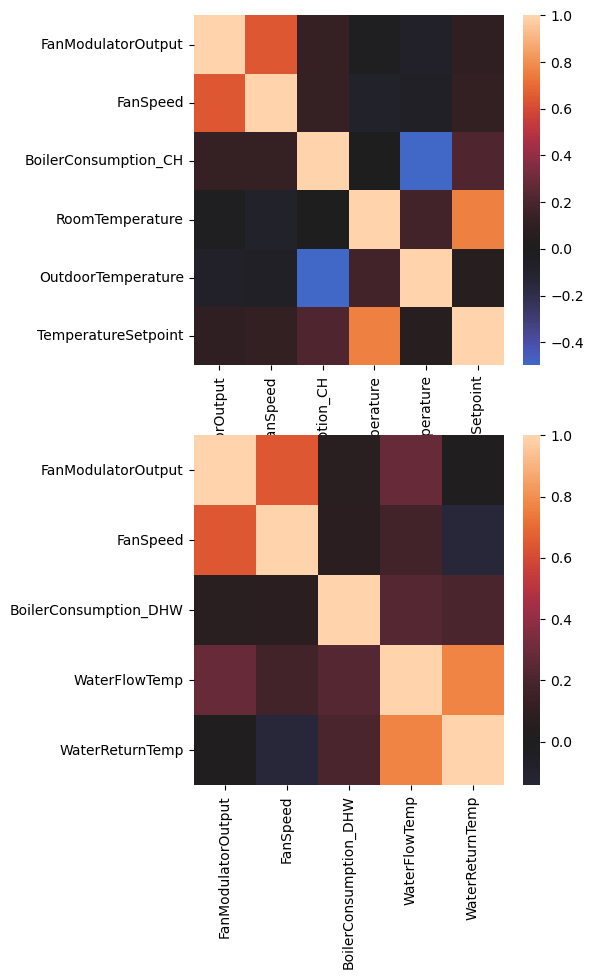

In [95]:
fig, axes = plt.subplots(nrows=2, figsize=(5, 10))
sns.heatmap(
    example_df[SHARED_COLUMNS+CENTRAL_HEATING_COLUMNS].corr(),
    center=0.0,
    ax=axes[0],
)
sns.heatmap(
    example_df[SHARED_COLUMNS+DOMESTIC_HOT_WATER_COLUMNS].corr(),
    center=0.0,
    ax=axes[1],
)

/usr/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/lib/python3.11/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/lib/python3.11/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/lib

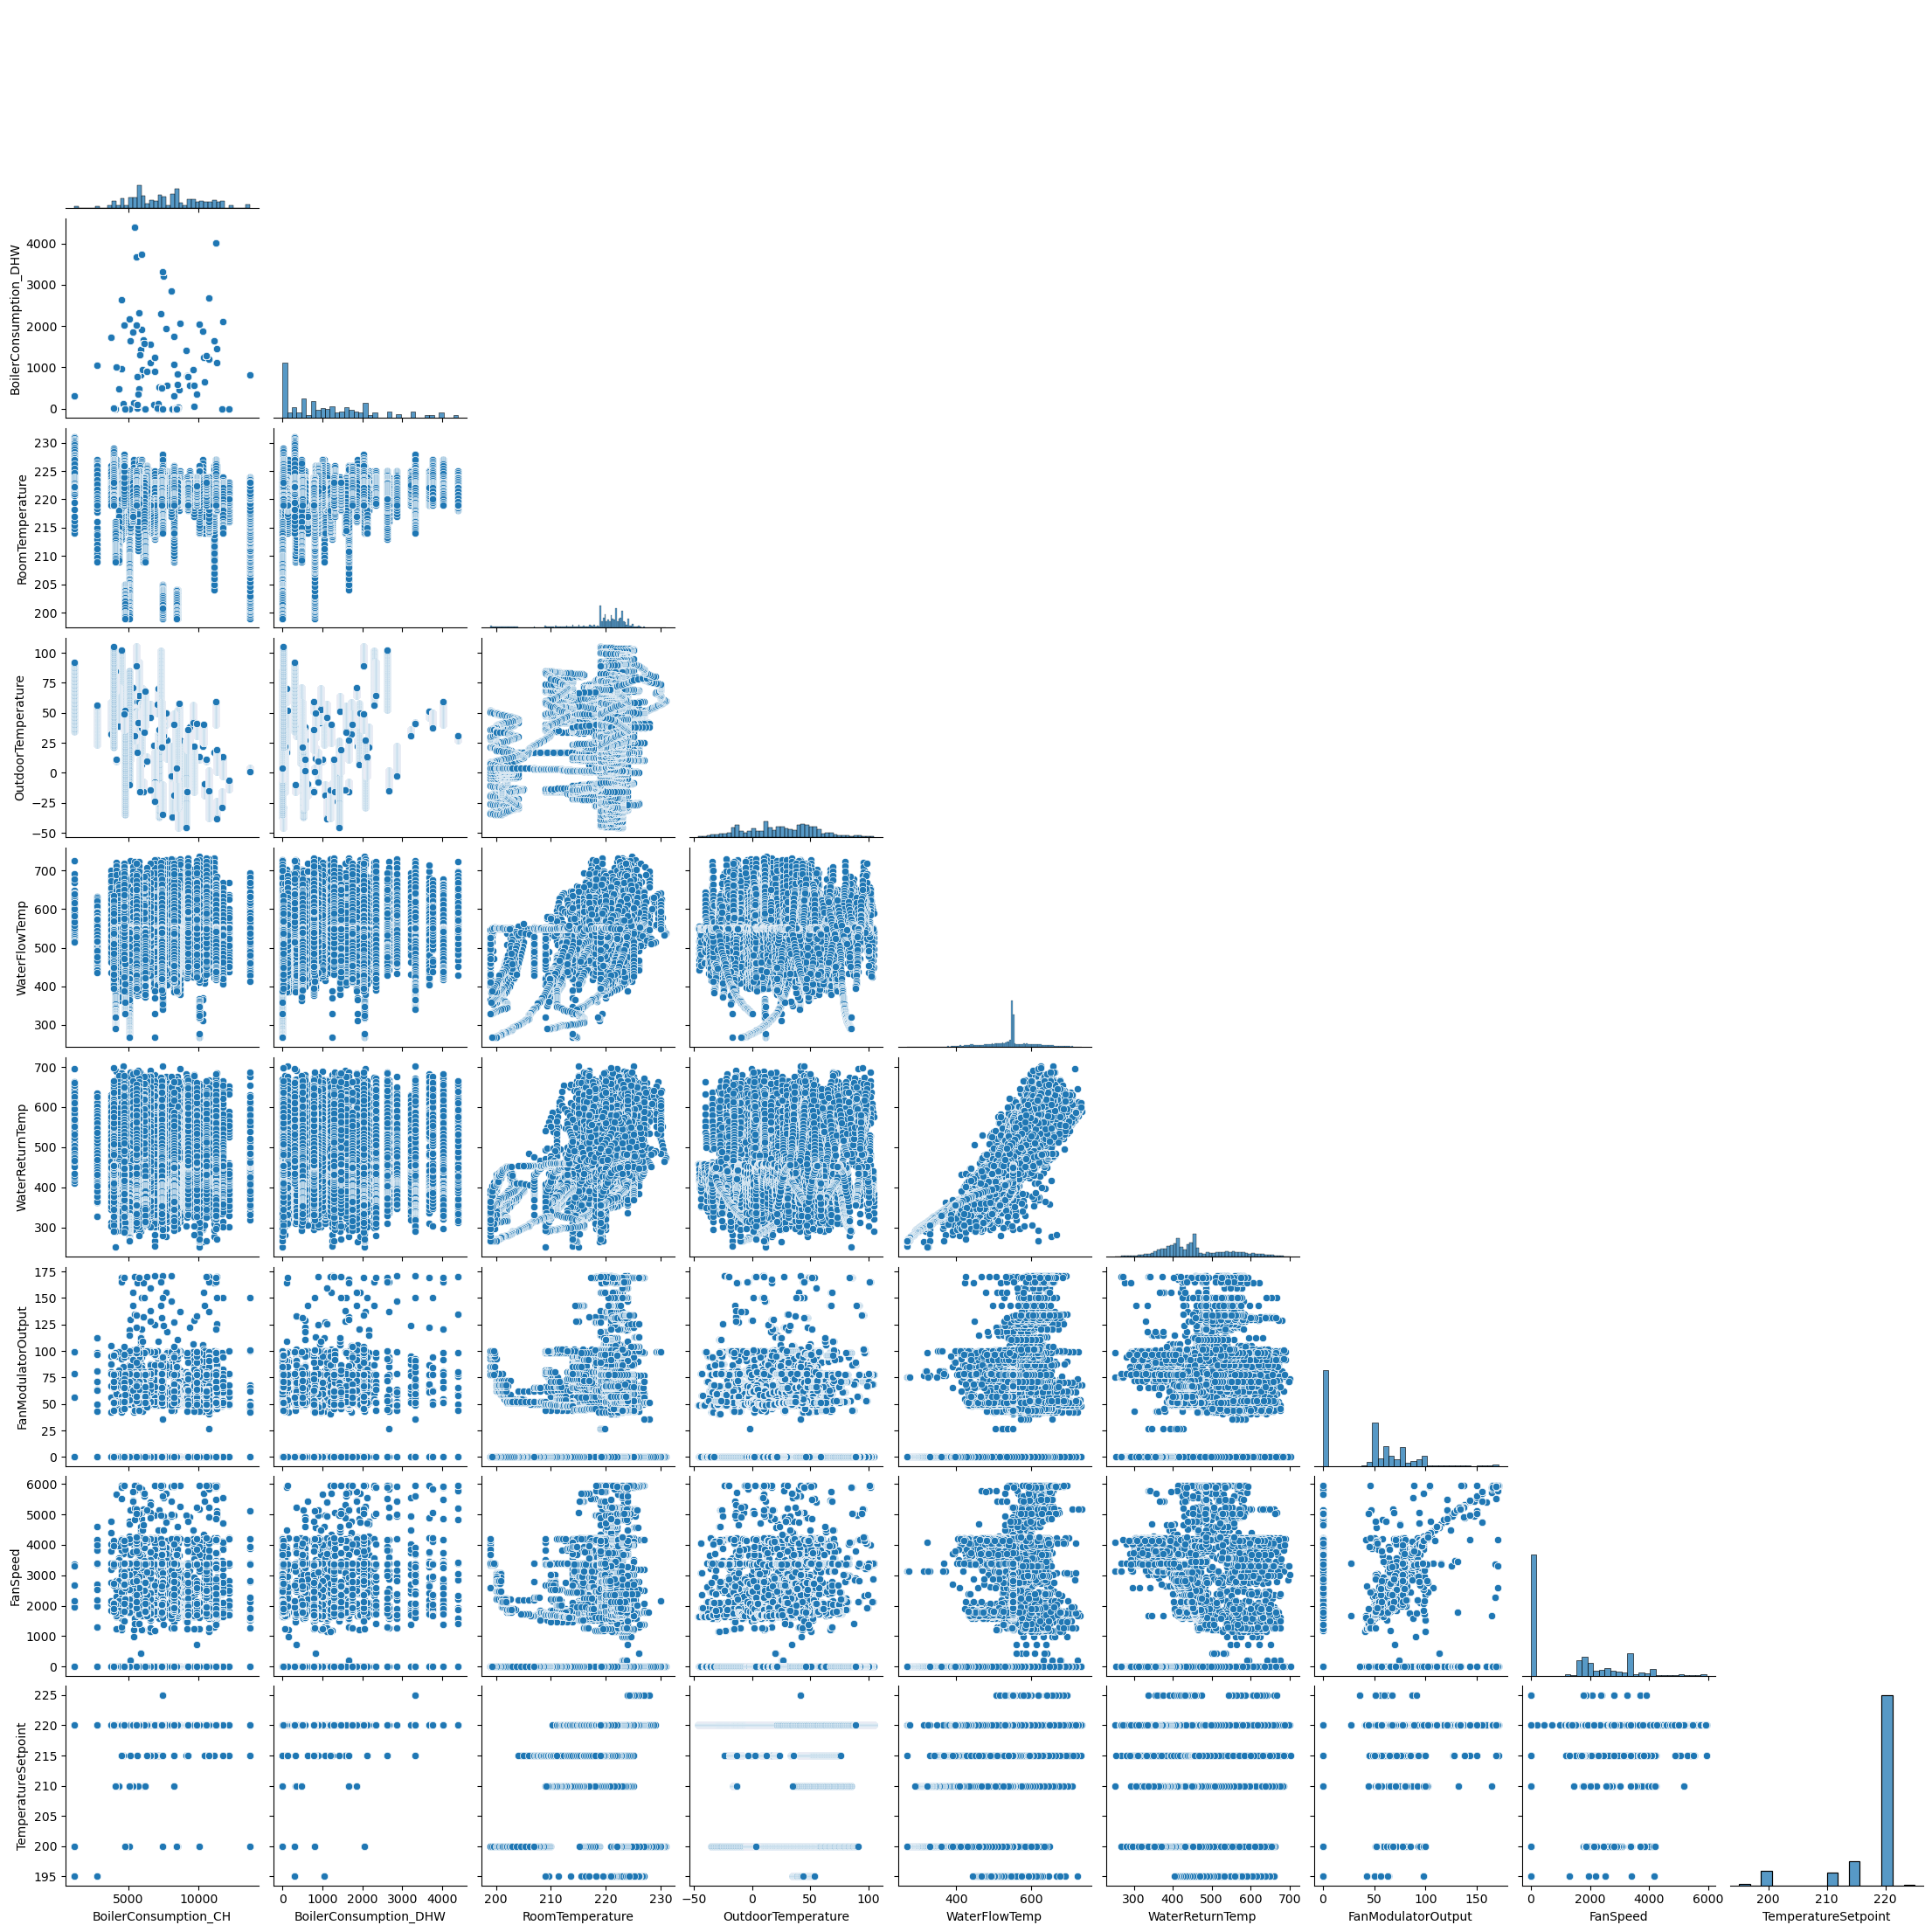

In [96]:
sns.pairplot(example_df, corner=True)

<Axes: xlabel='OutdoorTemperature', ylabel='BoilerConsumption_CH'>

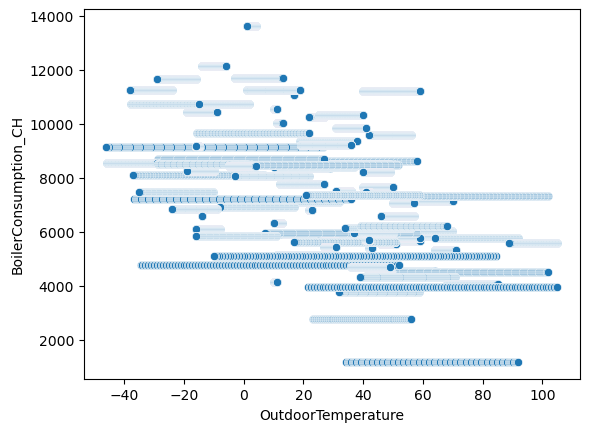

In [63]:
sns.scatterplot(example_df, x="OutdoorTemperature", y="BoilerConsumption_CH")

<Axes: >

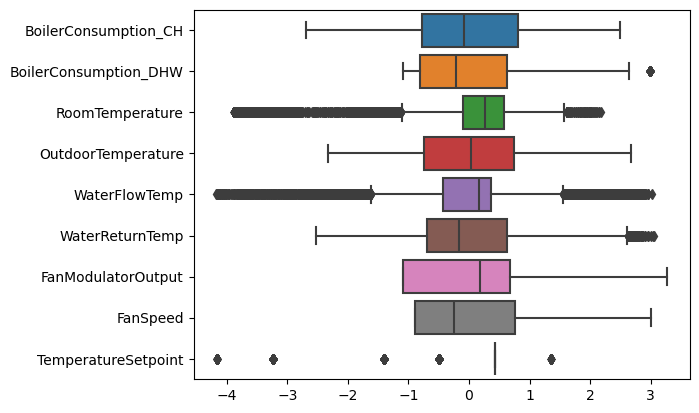

In [28]:
sns.boxplot(normalised_example_df, orient="h")

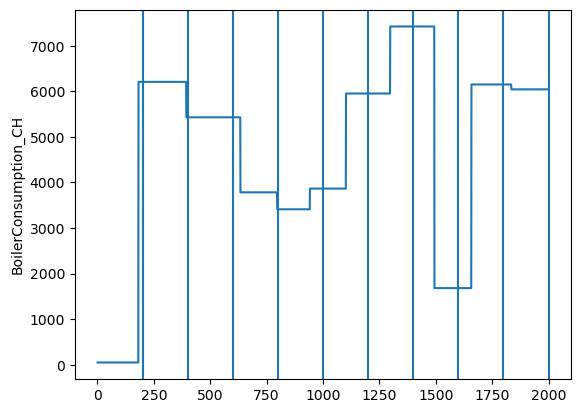

In [141]:
ax = sns.lineplot(example_df["BoilerConsumption_CH"][:2000])
for i in range(1, 10+1):
    ax.axvline(200 * i)